In [1]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/liron/OneDrive - Ariel University/Toar 1/third year/Yeda&Netunim/Jupyter/HW2/matala2_cosmetics_2019-2-Nov/matala2_cosmetics_2019-Nov.csv")
# data.head

<ipython-input-2-3c630cc3a087>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/liron/OneDrive - Ariel University/Toar 1/third year/Yeda&Netunim/Jupyter/HW2/matala2_cosmetics_2019-2-Nov/matala2_cosmetics_2019-Nov.csv")


### Check the type of event_time

In [ ]:
data.info()

# Q1

In [4]:
data['event_time'] = pd.to_datetime(data['event_time'])
data = data.sort_values(by=['user_id', 'user_session', 'event_time'])
data['duration_to_next_event'] = data.groupby(['user_id', 'user_session'])['event_time'].diff().dt.total_seconds().fillna(0)
data [30:60]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
30,2019-11-02 06:23:38+00:00,remove_from_cart,5788525,1.487580e+18,NaN,masura,3.95,20554973,e6f2e7c1-1060-4e8f-87eb-80c85cf2fd48,68.0
31,2019-11-02 06:24:37+00:00,remove_from_cart,5839671,1.487580e+18,NaN,masura,2.37,20554973,e6f2e7c1-1060-4e8f-87eb-80c85cf2fd48,59.0
32,2019-11-02 18:37:43+00:00,view,5823769,1.487580e+18,NaN,estel,2.38,22870151,27f42d5a-1c7f-4142-915d-3bda8f3dd612,0.0
33,2019-11-02 13:19:45+00:00,view,5739901,1.487580e+18,NaN,milv,3.49,27872944,465c3a6d-8d8c-407f-bc3c-9502452f41f1,0.0
34,2019-11-02 13:22:07+00:00,view,9823,1.487580e+18,NaN,NaN,3.41,27872944,465c3a6d-8d8c-407f-bc3c-9502452f41f1,142.0
118,2019-11-06 10:06:45+00:00,view,5823966,1.487580e+18,NaN,NaN,6.19,28048440,1104e1a5-a7f4-431b-a109-e72820db7b33,0.0
119,2019-11-06 10:10:19+00:00,cart,5560994,1.487580e+18,NaN,NaN,3.0,28048440,1104e1a5-a7f4-431b-a109-e72820db7b33,214.0
120,2019-11-06 10:11:08+00:00,cart,5726164,1.487580e+18,NaN,NaN,3.0,28048440,1104e1a5-a7f4-431b-a109-e72820db7b33,49.0
132,2019-11-07 10:13:49+00:00,view,5760173,1.487580e+18,NaN,ingarden,4.29,28048440,14c11a14-dc4c-4131-8b01-3aa5b692f569,0.0
133,2019-11-07 10:15:00+00:00,cart,5814520,1.487580e+18,NaN,runail,4.44,28048440,14c11a14-dc4c-4131-8b01-3aa5b692f569,71.0


# Q2

In [5]:
data = data.sort_values(by=['user_id','event_time'])
data['days_diff'] = data.groupby(['user_id'])['event_time'].diff().dt.days
data['funnel_number'] = np.where(data['days_diff'].fillna(0)>5,1,0)
data['funnel_number'] = data.groupby('user_id')['funnel_number'].cumsum()+1
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,days_diff,funnel_number
0,2019-11-04 15:28:57+00:00,view,5240,1.487580e+18,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,NaN,1
1,2019-11-06 10:40:34+00:00,cart,5614842,1.487580e+18,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,NaN,1
2,2019-11-06 10:41:26+00:00,cart,5766379,1.784000e+18,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,0.0,1
3,2019-11-06 10:43:30+00:00,purchase,5766379,1.784000e+18,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,0.0,1
4,2019-11-06 10:43:30+00:00,purchase,5614842,1.487580e+18,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2019-11-08 11:16:28+00:00,view,5861591,1.487580e+18,NaN,lador,2.22,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,0.0,NaN,1
1048571,2019-11-08 11:16:23+00:00,view,5799891,1.487580e+18,NaN,NaN,19.03,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,0.0,NaN,1
1048572,2019-11-08 11:16:55+00:00,view,5881598,2.151190e+18,NaN,lovely,12.56,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,0.0,NaN,1
1048573,2019-11-08 11:16:53+00:00,view,5876382,1.487580e+18,NaN,NaN,23.81,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,0.0,NaN,1


# Q3

In [6]:
data['session_shift'] = data['user_session'].shift()
data['session_same'] = np.where(data['session_shift']==data['user_session'],0,1)
data['index_in_funnel'] = data.groupby(['user_id','funnel_number'])['session_same'].cumsum()
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,days_diff,funnel_number,session_shift,session_same,index_in_funnel
0,2019-11-04 15:28:57+00:00,view,5240,1.487580e+18,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,NaN,1,None,1,1
1,2019-11-06 10:40:34+00:00,cart,5614842,1.487580e+18,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,NaN,1,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1
2,2019-11-06 10:41:26+00:00,cart,5766379,1.784000e+18,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,0.0,1,f873d16b-4efa-4e92-81be-92948aef2ff5,0,1
3,2019-11-06 10:43:30+00:00,purchase,5766379,1.784000e+18,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,0.0,1,f873d16b-4efa-4e92-81be-92948aef2ff5,0,1
4,2019-11-06 10:43:30+00:00,purchase,5614842,1.487580e+18,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,0.0,1,f873d16b-4efa-4e92-81be-92948aef2ff5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2019-11-08 11:16:28+00:00,view,5861591,1.487580e+18,NaN,lador,2.22,568926337,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,0.0,NaN,1,7ecb4c27-2eb2-404f-995f-4cac2183278e,1,1
1048571,2019-11-08 11:16:23+00:00,view,5799891,1.487580e+18,NaN,NaN,19.03,568926338,09994a71-7ac0-415a-9f49-d8df982ac9dd,0.0,NaN,1,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,1,1
1048572,2019-11-08 11:16:55+00:00,view,5881598,2.151190e+18,NaN,lovely,12.56,568926409,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,0.0,NaN,1,09994a71-7ac0-415a-9f49-d8df982ac9dd,1,1
1048573,2019-11-08 11:16:53+00:00,view,5876382,1.487580e+18,NaN,NaN,23.81,568926576,de462037-13f3-4217-9b8e-408e1ba014d9,0.0,NaN,1,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,1,1


# Q4

In [7]:
def price_float(price):
    if (not isinstance(price, float)):
        if (re.search('[0-9]*\.[0-9]*', price)):
            price = re.findall('[0-9]*\.[0-9]*', price)[0]
        elif (isinstance(price, float)):
            price = float(price)
#         else:
#             price = 'Nan'
    else:
        price = float(price)
    return price


data['price'] = data['price'].apply(price_float).reset_index(drop=True)

# Q5

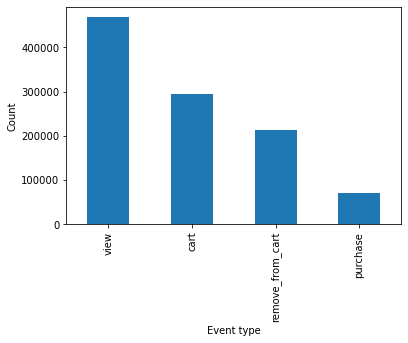

In [8]:
event_counts = data['event_type'].value_counts()

# plot the result using a bar chart
fig, ax = plt.subplots()
event_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Event type')
ax.set_ylabel('Count')
plt.show()

# Q6

## a-f

In [9]:
session_data = pd.DataFrame({'user_id' : data['user_id'],
                'event_time' :data['event_time'],
                'user_session': data['user_session'],
                'funnel_number': data['funnel_number'],
                'index_in_funnel': data['index_in_funnel'],
                'product_id' : data['product_id'],
                'event_type' : data['event_type'],
                'duration_to_next_event' : data['duration_to_next_event']}).reset_index()
#______________________________________________________________________________________________________________________________
session_data['event_num_in_session'] = session_data.groupby(['user_id','user_session'])['funnel_number'].transform('size')
#______________________________________________________________________________________________________________________________
session_data['time_in_web'] = session_data.groupby(['user_id','user_session'])['duration_to_next_event'].transform('sum')

## g

In [10]:
def get_products_per_session_view(data):
    data = pd.DataFrame(data.values, columns=['product_id','event_type'])
    session_products = data[data['event_type']=='view']['product_id'].unique().tolist()
    return session_products

session_products = session_data.groupby(['user_id', 'user_session'])[['product_id','event_type']].apply(get_products_per_session_view).reset_index(name='views_list')
session_data = pd.merge(session_data, session_products, on=['user_id', 'user_session'], how='left')

## h

In [11]:
def get_products_per_session_cart(data):
    data = pd.DataFrame(data.values, columns=['product_id','event_type'])
    session_products = data[data['event_type']=='cart']['product_id'].unique().tolist()
    return session_products

session_products = session_data.groupby(['user_id', 'user_session'])[['product_id','event_type']].apply(get_products_per_session_cart).reset_index(name='cart_list')
session_data = pd.merge(session_data, session_products, on=['user_id', 'user_session'], how='left')

## i

In [12]:
def get_products_per_session_purchase(data):
    
    data = pd.DataFrame(data.values, columns=['product_id','event_type'])
    session_products = data[data['event_type']=='purchase']['product_id'].unique().tolist()
    return session_products



session_products = session_data.groupby(['user_id', 'user_session'])[['product_id','event_type']].apply(get_products_per_session_purchase).reset_index(name='purchase_list')
session_data = pd.merge(session_data, session_products, on=['user_id', 'user_session'], how='left')

session_data

,index,user_id,event_time,user_session,funnel_number,index_in_funnel,product_id,event_type,duration_to_next_event,event_num_in_session,time_in_web,views_list,cart_list,purchase_list
0,0,1120748,2019-11-04 15:28:57+00:00,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,5240,view,0.0,1.0,0.0,[5240],[],[]
1,1,10079204,2019-11-06 10:40:34+00:00,f873d16b-4efa-4e92-81be-92948aef2ff5,1,1,5614842,cart,0.0,4.0,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
2,2,10079204,2019-11-06 10:41:26+00:00,f873d16b-4efa-4e92-81be-92948aef2ff5,1,1,5766379,cart,52.0,4.0,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
3,3,10079204,2019-11-06 10:43:30+00:00,f873d16b-4efa-4e92-81be-92948aef2ff5,1,1,5766379,purchase,124.0,4.0,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
4,4,10079204,2019-11-06 10:43:30+00:00,f873d16b-4efa-4e92-81be-92948aef2ff5,1,1,5614842,purchase,0.0,4.0,176.0,[],"[5614842, 5766379]","[5766379, 5614842]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,568926337,2019-11-08 11:16:28+00:00,1325e7ce-c706-4253-99ad-1eaf9cfe70ee,1,1,5861591,view,0.0,1.0,0.0,[5861591],[],[]
1048571,1048571,568926338,2019-11-08 11:16:23+00:00,09994a71-7ac0-415a-9f49-d8df982ac9dd,1,1,5799891,view,0.0,1.0,0.0,[5799891],[],[]
1048572,1048572,568926409,2019-11-08 11:16:55+00:00,0e45dae2-2e7a-4919-9ec2-cbecd4354a02,1,1,5881598,view,0.0,1.0,0.0,[5881598],[],[]
1048573,1048573,568926576,2019-11-08 11:16:53+00:00,de462037-13f3-4217-9b8e-408e1ba014d9,1,1,5876382,view,0.0,1.0,0.0,[5876382],[],[]
